### Penguine Data

#### 1.Read in the Penguins Dataset with pandas.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
path_to_penguines = '../data/penguins_simple.csv'
penguines = pd.read_csv(path_to_penguines, sep=";")

In [4]:
penguines

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie,39.1,18.7,181.0,3750.0,MALE
1,Adelie,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...
328,Gentoo,47.2,13.7,214.0,4925.0,FEMALE
329,Gentoo,46.8,14.3,215.0,4850.0,FEMALE
330,Gentoo,50.4,15.7,222.0,5750.0,MALE
331,Gentoo,45.2,14.8,212.0,5200.0,FEMALE


#### 2.Go through each column and determine its level of measurement and dtype.

In [5]:
# get all the column names so I don't have to type them
all_columns = penguines.columns

In [6]:
for col in all_columns:
    #does not feel like a good metric for ordinal vs nominal though
    dtype = penguines[col].dtype
    level_of_measurement = 'ordinal'
    if dtype != 'float64':
        level_of_measurement = 'nominal'
    print(f'{col}:\n\tLevel of measurements:\t{level_of_measurement}\n\tdtype:\t\t\t{penguines[col].dtype}')

Species:
	Level of measurements:	nominal
	dtype:			object
Culmen Length (mm):
	Level of measurements:	ordinal
	dtype:			float64
Culmen Depth (mm):
	Level of measurements:	ordinal
	dtype:			float64
Flipper Length (mm):
	Level of measurements:	ordinal
	dtype:			float64
Body Mass (g):
	Level of measurements:	ordinal
	dtype:			float64
Sex:
	Level of measurements:	nominal
	dtype:			object


#### 3.Calculate 3 interesting statistics and post them in the slack channel.

MALE      100
FEMALE     71
Name: Sex, dtype: int64


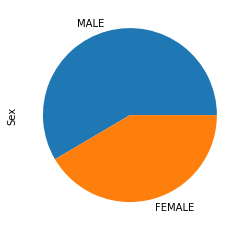

In [59]:
# percentage of males with a bigger than average culmen length
culmen_mean = penguines['Culmen Length (mm)'].mean()
bigger_than_mean = penguines[penguines['Culmen Length (mm)'] > culmen_mean]
bigger_than_mean_by_sex = bigger_than_mean.Sex.value_counts()
print(bigger_than_mean_by_sex)
bigger_than_mean_by_sex.plot.pie()


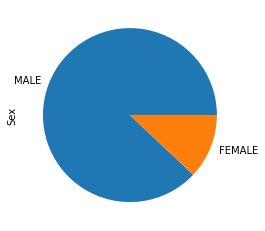

In [64]:
# percentage of males with a bigger than median culmen length
culmen_top_75 = penguines['Culmen Length (mm)'].quantile(q=0.75)
bigger_than_culmen_top_75 = penguines[penguines['Culmen Length (mm)'] > culmen_top_75]
bigger_than_culmen_top_75.Sex.value_counts().plot.pie()

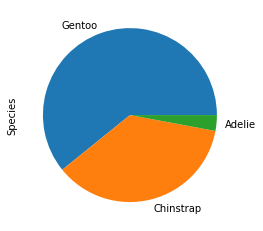

In [65]:
# percentage by species of bigger than mean
bigger_than_mean['Species'].value_counts().plot.pie()

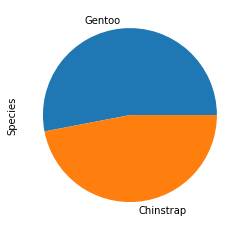

In [66]:
# percentage by species of bigger than quantile 75
bigger_than_culmen_top_75.Species.value_counts().plot.pie()

Is there a correlation between culmen length and depth?

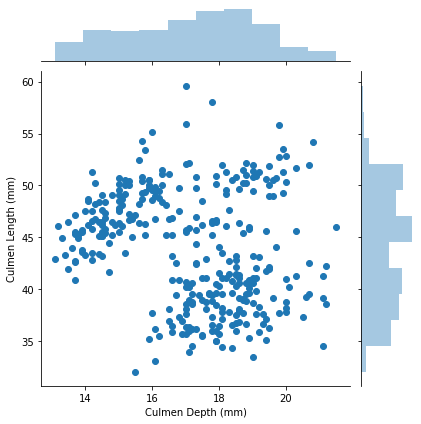

In [81]:
# sns.jointplot(x = df.population, y = df.fertility, kind = 'scatter')
sns.jointplot(x = penguines['Culmen Depth (mm)'], y = penguines['Culmen Length (mm)'], kind = 'scatter')

That does not look like a huge correlation but maybe it gets clearer when we seperate by Species

In [94]:
penguines.Species.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

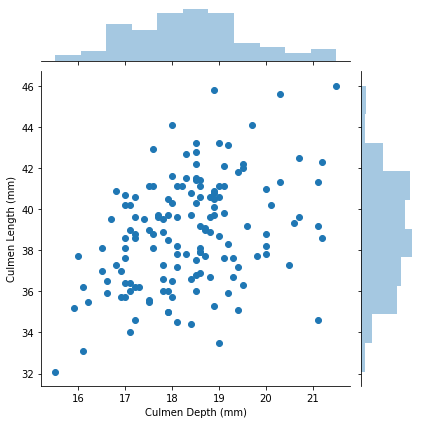

In [86]:
adelie = penguines[penguines.Species == 'Adelie']
chinstrap = penguines[penguines.Species == 'Chinstrap']
gentoo = penguines[penguines.Species == 'Gentoo']

sns.jointplot(x = adelie['Culmen Depth (mm)'], y = adelie['Culmen Length (mm)'], kind = 'scatter')

In [87]:
adelie['Culmen Depth (mm)'].corr(adelie['Culmen Length (mm)'])

0.38581320049557905

In [102]:
species = [adelie, chinstrap, gentoo]
for specie in species:
    print(specie.Species.unique()[0])
    print(specie['Culmen Depth (mm)'].corr(specie['Culmen Length (mm)']))

Adelie
0.38581320049557905
Chinstrap
0.6535362081800428
Gentoo
0.654023314272654


it looks like the correlation is stronger for other species so lets look at chinstaps

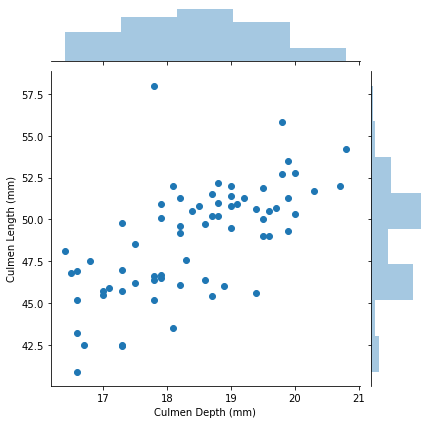

In [103]:
sns.jointplot(x=chinstrap['Culmen Depth (mm)'], y = chinstrap['Culmen Length (mm)'], kind = 'scatter')

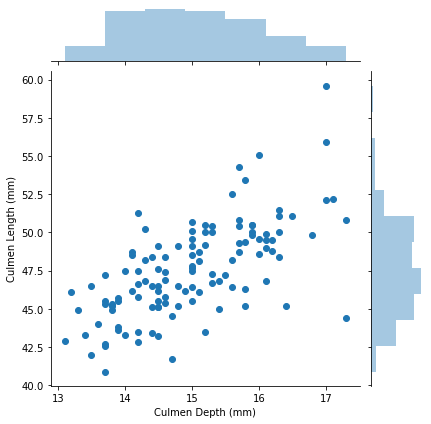

In [106]:
sns.jointplot(x=gentoo['Culmen Depth (mm)'], y=gentoo['Culmen Length (mm)'], kind='scatter')

now lets find out what the mean weight is per species

In [111]:
# making use of the fact that i have them separated by species already
print('Adelie',adelie['Body Mass (g)'].mean(),"g")
print('Chinstrap',chinstrap['Body Mass (g)'].mean(),"g")
print('Gentoo', gentoo['Body Mass (g)'].mean(),"g")

Adelie 3706.1643835616437 g
Chinstrap 3733.0882352941176 g
Gentoo 5092.436974789916 g


In [113]:
# but I can also do this more efficient
penguines.groupby('Species')['Body Mass (g)'].mean()

Species
Adelie       3706.164384
Chinstrap    3733.088235
Gentoo       5092.436975
Name: Body Mass (g), dtype: float64

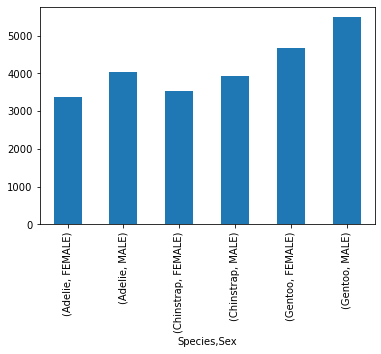

In [120]:
# can I also segregate those facts by sex?

findings = penguines.groupby(['Species', 'Sex'])['Body Mass (g)'].mean()
findings.plot.bar()

## ps
is there a correlation for the culmen length if i segeregate adelie penguins by sex?

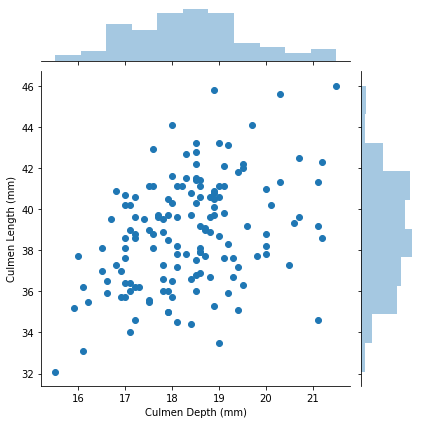

In [121]:
sns.jointplot(x = adelie['Culmen Depth (mm)'], y = adelie['Culmen Length (mm)'], kind = 'scatter')

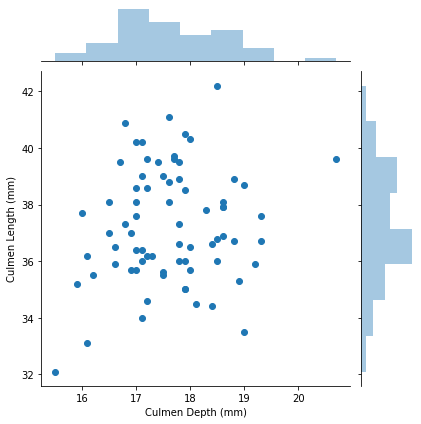

In [124]:
adelie_female = adelie[adelie.Sex == 'FEMALE']
sns.jointplot(x=adelie_female['Culmen Depth (mm)'], y = adelie_female['Culmen Length (mm)'], kind = 'scatter')

In [125]:
adelie_female['Culmen Depth (mm)'].corr(adelie_female['Culmen Length (mm)'])

0.16063614883268637

In [127]:
adelie_male = adelie[adelie.Sex == 'MALE']
adelie_male['Culmen Depth (mm)'].corr(adelie_male['Culmen Length (mm)'])

-0.03824715618457483

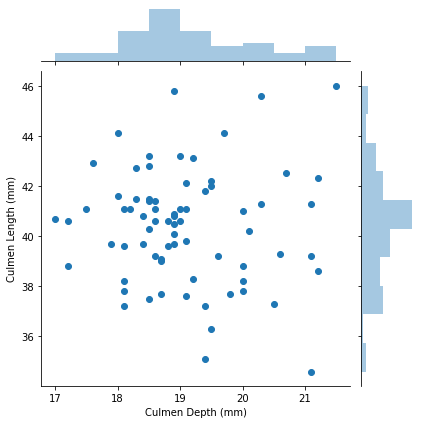

In [128]:
sns.jointplot(x = adelie_male['Culmen Depth (mm)'], y = adelie_male['Culmen Length (mm)'], kind = 'scatter')

well no